Q3: State prices q = [0.9  0.85 0.8 ]
No-arbitrage (q >= 0)? True


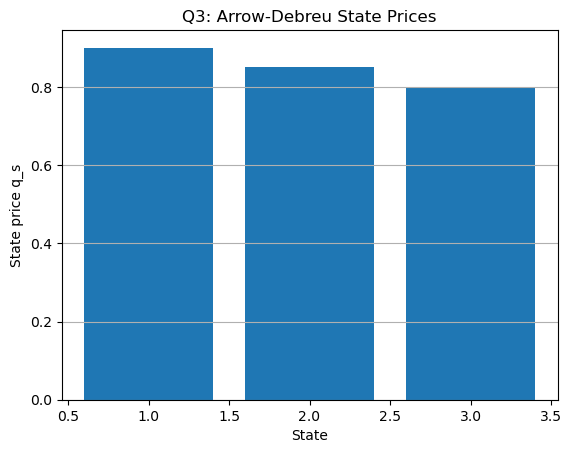

Implied risk-free price: 2.55
Implied one-period risk-free rate: -0.6078431372549019


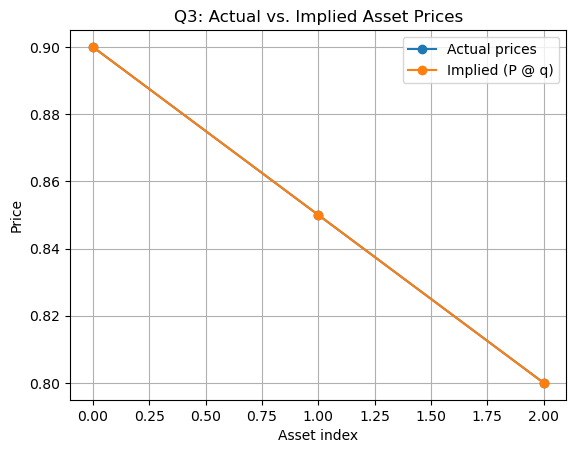

In [1]:
### Niraj Neupane

## Financial Micro Economics

# ============================================================
# Q3 — State Prices (Arrow-Debreu) + No-Arbitrage Check + Plots
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) Compute state prices from asset prices and payoffs
# ----------------------------
def compute_state_prices(payoff_matrix, asset_prices):
    """
    payoff_matrix: shape (n_assets, n_states)
    asset_prices:  shape (n_assets,)
    Solve: payoff_matrix @ q = ???  (depends on your convention)
    Standard: price_i = sum_s q_s * payoff_{i,s}
    => P @ q = prices  where P is (n_assets x n_states)
    """
    P = np.asarray(payoff_matrix, dtype=float)
    p = np.asarray(asset_prices, dtype=float)
    q, *_ = np.linalg.lstsq(P, p, rcond=None)  # robust even if square
    return q

def no_arbitrage_check_state_prices(q):
    q = np.asarray(q, dtype=float)
    return np.all(q >= -1e-10)

# ----------------------------
# 2) Example inputs (REPLACE with your actual Q3 payoffs/prices)
# ----------------------------
# Payoffs of 3 assets across 3 states (example)
P = np.array([
    [1, 0, 0],   # Asset 1
    [0, 1, 0],   # Asset 2
    [0, 0, 1],   # Asset 3
], dtype=float)

prices = np.array([0.90, 0.85, 0.80], dtype=float)

q = compute_state_prices(P, prices)
print("Q3: State prices q =", q)
print("No-arbitrage (q >= 0)?", no_arbitrage_check_state_prices(q))

# ----------------------------
# 3) Plot: state prices
# ----------------------------
plt.figure()
plt.bar(range(1, len(q)+1), q)
plt.xlabel("State")
plt.ylabel("State price q_s")
plt.title("Q3: Arrow-Debreu State Prices")
plt.grid(True, axis="y")
plt.show()

# ----------------------------
# 4) Implied discount factor & risk-free rate (if payoff of risk-free = 1 in every state)
# ----------------------------
# If a risk-free pays 1 in each state, then price_rf = sum q_s
price_rf = float(np.sum(q))
df_1 = price_rf  # discount factor for one-period payoff of 1
r_f = (1.0 / df_1) - 1.0 if df_1 > 0 else np.nan
print("Implied risk-free price:", price_rf)
print("Implied one-period risk-free rate:", r_f)

# Plot: compare actual prices vs model-implied prices
implied_prices = P @ q
plt.figure()
plt.plot(prices, marker="o", label="Actual prices")
plt.plot(implied_prices, marker="o", label="Implied (P @ q)")
plt.xlabel("Asset index")
plt.ylabel("Price")
plt.title("Q3: Actual vs. Implied Asset Prices")
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# Suggestions (optional):
# - If your Q3 includes probabilities π and SDF m_s, compute m_s = q_s / π_s
# - Add an arbitrage test: if any q_s < 0 materially, explain arbitrage intuition
# - If more assets than states, use least squares + check pricing errors
